In [1]:
# loading libraries

import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

In [2]:
# Display all df columns
pd.set_option("display.max_columns", None)

# Set up with a higher resolution screen
%config InlineBackend.figure_format = 'retina'

- Dataset with flights with same original and destination State

In [3]:
selected_columns = ['icao_origin', 'dep_city', 'dep_state', 'route_icao', 'seats_sold', 'seats_free', 'sched_year']

In [4]:
df_same_state = pd.read_csv('./assets/csv/df_all_years/same_state.csv', sep=',', usecols=selected_columns)

In [5]:
df_same_state['seats_total'] = df_same_state['seats_sold'] + df_same_state['seats_free']

In [6]:
df_same_state.drop(columns=['seats_sold', 'seats_free'], inplace=True)

In [7]:
len(df_same_state)

889984

In [8]:
same_state_reg = df_same_state.groupby('sched_year').agg(
    nr_airports=('icao_origin', lambda x: x.nunique()),
    route_icao=('route_icao', lambda x: x.nunique()),
    seats_total=('seats_total', 'sum'),
).reset_index()

In [9]:
same_state_reg

,sched_year,nr_airports,route_icao,seats_total
0,2002,50,80,282741.0
1,2003,49,85,741409.0
2,2004,39,63,961966.0
3,2005,32,48,1299861.0
4,2006,39,59,1191731.0
5,2007,47,80,1153547.0
6,2008,34,54,1262756.0
7,2009,30,39,1785518.0
8,2010,89,179,2335111.0
9,2011,102,221,3469155.0


In [10]:
non_reg_airports_icao = [
    'SBAR', 'SBBE', 'SBBR', 'SBBV', 'SBCF', 'SBCG', 'SBCT', 'SBCY',
    'SBEG', 'SBFL', 'SBFZ', 'SBGL', 'SBGO', 'SBGR', 'SBJP', 'SBKP',
    'SBMO', 'SBMQ', 'SBPA', 'SBPJ', 'SBPM', 'SBPV', 'SBRB', 'SBRF',
    'SBRJ', 'SBSG', 'SBSL', 'SBSP', 'SBSV', 'SBTE', 'SBVT'
]

In [11]:
same_state_from_non_reg = df_same_state[
    (df_same_state["icao_origin"].isin(non_reg_airports_icao) == True)
]

In [12]:
same_state_from_non_reg = same_state_from_non_reg.groupby('sched_year').agg(
    nr_airports=('icao_origin', lambda x: x.nunique()),
    route_icao=('route_icao', lambda x: x.nunique()),
    seats_total=('seats_total', 'sum'),
).reset_index()

In [13]:
same_state_from_non_reg

,sched_year,nr_airports,route_icao,seats_total
0,2002,14,30,130262.0
1,2003,16,35,341233.0
2,2004,12,28,463394.0
3,2005,12,20,615846.0
4,2006,14,28,597558.0
5,2007,17,38,577900.0
6,2008,13,29,617280.0
7,2009,12,19,868925.0
8,2010,19,54,1130701.0
9,2011,20,64,1641927.0


In [14]:
same_state = pd.merge(same_state_reg, same_state_from_non_reg, on='sched_year')

In [15]:
same_state['pax_total'] = same_state['seats_total_x']
same_state['airports_from_reg'] = same_state['nr_airports_x'] - same_state['nr_airports_y']
same_state['routes_from_reg'] = same_state['route_icao_x'] - same_state['route_icao_y']
same_state['pax_from_reg'] = same_state['seats_total_x'] - same_state['seats_total_y']

In [16]:
same_state['airports_from_non_reg'] = same_state['nr_airports_y']
same_state['routes_from_non_reg'] = same_state['route_icao_y']
same_state['pax_from_non_reg'] = same_state['seats_total_y']

In [17]:
same_state.drop(columns=['nr_airports_x', 'route_icao_x', 'seats_total_x', 'nr_airports_y', 'route_icao_y', 'seats_total_y'], inplace=True)

In [18]:
same_state

,sched_year,pax_total,airports_from_reg,routes_from_reg,pax_from_reg,airports_from_non_reg,routes_from_non_reg,pax_from_non_reg
0,2002,282741.0,36,50,152479.0,14,30,130262.0
1,2003,741409.0,33,50,400176.0,16,35,341233.0
2,2004,961966.0,27,35,498572.0,12,28,463394.0
3,2005,1299861.0,20,28,684015.0,12,20,615846.0
4,2006,1191731.0,25,31,594173.0,14,28,597558.0
5,2007,1153547.0,30,42,575647.0,17,38,577900.0
6,2008,1262756.0,21,25,645476.0,13,29,617280.0
7,2009,1785518.0,18,20,916593.0,12,19,868925.0
8,2010,2335111.0,70,125,1204410.0,19,54,1130701.0
9,2011,3469155.0,82,157,1827228.0,20,64,1641927.0


- Dataset with flights with different original and destination state

In [19]:
selected_columns = ['icao_origin', 'dep_city', 'dep_state', 'icao_dest','route_icao', 'seats_sold', 'seats_free', 'sched_year']

In [20]:
df_different_state = pd.read_csv('./assets/csv/df_all_years/different_state.csv', sep=',', usecols=selected_columns)

In [21]:
df_different_state['seats_total'] = df_different_state['seats_sold'] + df_different_state['seats_free']

In [22]:
df_different_state.drop(columns=['seats_sold', 'seats_free'], inplace=True)

In [23]:
df_different_state

,icao_origin,dep_city,dep_state,sched_year,icao_dest,route_icao,seats_total
0,SBCT,São José Dos Pinhais,PR,2002,SBSP,SBCT-SBSP,136.0
1,SBCT,São José Dos Pinhais,PR,2002,SBSP,SBCT-SBSP,127.0
2,SBCT,São José Dos Pinhais,PR,2002,SBKP,SBCT-SBKP,37.0
3,SBCT,São José Dos Pinhais,PR,2002,SBPA,SBCT-SBPA,130.0
4,SBCT,São José Dos Pinhais,PR,2002,SBPA,SBCT-SBPA,139.0
...,...,...,...,...,...,...,...
7861694,SBCT,São José Dos Pinhais,PR,2021,SBGR,SBCT-SBGR,84.0
7861695,SBGL,Rio De Janeiro,RJ,2021,SBGR,SBGL-SBGR,125.0
7861696,SBBR,Brasília,DF,2021,SBGL,SBBR-SBGL,108.0
7861697,SBBR,Brasília,DF,2021,SBGR,SBBR-SBGR,136.0


In [24]:
different_state_reg = df_different_state[
    (df_different_state["icao_origin"].isin(non_reg_airports_icao) == False)
]

In [25]:
len(different_state_reg)

614370

In [26]:
different_state_reg = different_state_reg[
    (different_state_reg["icao_dest"].isin(non_reg_airports_icao) == False)
]

In [27]:
len(different_state_reg)

33292

In [28]:
different_state_reg

,icao_origin,dep_city,dep_state,sched_year,icao_dest,route_icao,seats_total
5767,SBBH,Belo Horizonte,MG,2002,SBPS,SBBH-SBPS,2.0
5768,SBPS,Porto Seguro,BA,2002,SBBH,SBPS-SBBH,8.0
5786,SBRP,Ribeirão Preto,SP,2002,SBUR,SBRP-SBUR,14.0
5787,SBUR,Uberaba,MG,2002,SBRP,SBUR-SBRP,23.0
5833,SBPL,Petrolina,PE,2002,SBKG,SBPL-SBKG,20.0
...,...,...,...,...,...,...,...
7836284,SBPS,Porto Seguro,BA,2021,SBUL,SBPS-SBUL,133.0
7836969,SBUL,Uberlândia,MG,2021,SBPS,SBUL-SBPS,174.0
7837148,SBMS,Mossoró,RN,2021,SBAC,SBMS-SBAC,22.0
7837519,SBPS,Porto Seguro,BA,2021,SBSR,SBPS-SBSR,171.0


In [29]:
different_state_reg_2 = different_state_reg.groupby('sched_year').agg(
    nr_airports=('icao_origin', lambda x: x.nunique()),
    route_icao=('route_icao', lambda x: x.nunique()),
    seats_total=('seats_total', 'sum'),
).reset_index()

In [30]:
different_state_reg_2

,sched_year,nr_airports,route_icao,seats_total
0,2002,8,8,12274.0
1,2003,11,14,80905.0
2,2004,10,14,86801.0
3,2005,3,3,14902.0
4,2006,8,10,11157.0
5,2007,7,7,21662.0
6,2008,2,2,117.0
7,2009,5,6,2143.0
8,2010,18,23,27778.0
9,2011,31,43,71548.0


In [31]:
# different state non-regional

In [32]:
different_state_non_reg = df_different_state.groupby('sched_year').agg(
    nr_airports=('icao_origin', lambda x: x.nunique()),
    route_icao=('route_icao', lambda x: x.nunique()),
    seats_total=('seats_total', 'sum'),
).reset_index()

In [33]:
different_state_non_reg

,sched_year,nr_airports,route_icao,seats_total
0,2002,57,322,5497077.0
1,2003,58,383,17688189.0
2,2004,52,383,19279705.0
3,2005,45,290,22214650.0
4,2006,49,325,22714426.0
5,2007,52,347,21486761.0
6,2008,50,320,23891046.0
7,2009,48,368,33443989.0
8,2010,75,511,42758247.0
9,2011,88,579,49875771.0


In [34]:
different_state = pd.merge(different_state_reg_2, different_state_non_reg, on='sched_year')

In [35]:
different_state['airports_from_reg'] = different_state['nr_airports_x']
different_state['routes_from_reg'] = different_state['route_icao_x']
different_state['pax_from_reg'] = different_state['seats_total_x']

In [36]:
different_state['airports_from_non_reg'] = different_state['nr_airports_y'] - different_state['nr_airports_x']
different_state['routes_from_non_reg'] = different_state['route_icao_y'] - different_state['route_icao_x']
different_state['pax_from_non_reg'] = different_state['seats_total_y'] - different_state['seats_total_x']

In [37]:
different_state.drop(columns=['nr_airports_x', 'route_icao_x', 'seats_total_x', 'nr_airports_y', 'route_icao_y', 'seats_total_y'], inplace=True)

In [38]:
different_state

,sched_year,airports_from_reg,routes_from_reg,pax_from_reg,airports_from_non_reg,routes_from_non_reg,pax_from_non_reg
0,2002,8,8,12274.0,49,314,5484803.0
1,2003,11,14,80905.0,47,369,17607284.0
2,2004,10,14,86801.0,42,369,19192904.0
3,2005,3,3,14902.0,42,287,22199748.0
4,2006,8,10,11157.0,41,315,22703269.0
5,2007,7,7,21662.0,45,340,21465099.0
6,2008,2,2,117.0,48,318,23890929.0
7,2009,5,6,2143.0,43,362,33441846.0
8,2010,18,23,27778.0,57,488,42730469.0
9,2011,31,43,71548.0,57,536,49804223.0


- Final dataset

In [39]:
reg_and_non_reg = pd.merge(different_state, same_state, on='sched_year')

In [40]:
reg_and_non_reg['airports_from_reg'] = reg_and_non_reg['airports_from_reg_x'] + reg_and_non_reg['airports_from_reg_y']
reg_and_non_reg['routes_from_reg'] = reg_and_non_reg['routes_from_reg_x'] + reg_and_non_reg['routes_from_reg_y']
reg_and_non_reg['pax_from_reg'] = reg_and_non_reg['pax_from_reg_x'] + reg_and_non_reg['pax_total']

In [41]:
reg_and_non_reg['airports_from_non_reg'] = reg_and_non_reg['airports_from_non_reg_x'] + reg_and_non_reg['airports_from_non_reg_y']
reg_and_non_reg['routes_from_non_reg'] = reg_and_non_reg['routes_from_non_reg_x'] + reg_and_non_reg['routes_from_non_reg_y']
reg_and_non_reg['pax_from_non_reg'] = reg_and_non_reg['pax_from_non_reg_x']

In [42]:
reg_and_non_reg.drop(columns=['airports_from_reg_x', 'routes_from_reg_x',
       'pax_from_reg_x', 'airports_from_non_reg_x', 'routes_from_non_reg_x',
       'pax_from_non_reg_x', 'pax_total', 'airports_from_reg_y',
       'routes_from_reg_y', 'pax_from_reg_y', 'airports_from_non_reg_y',
       'routes_from_non_reg_y', 'pax_from_non_reg_y'], inplace=True)

In [43]:
reg_and_non_reg

,sched_year,airports_from_reg,routes_from_reg,pax_from_reg,airports_from_non_reg,routes_from_non_reg,pax_from_non_reg
0,2002,44,58,295015.0,63,344,5484803.0
1,2003,44,64,822314.0,63,404,17607284.0
2,2004,37,49,1048767.0,54,397,19192904.0
3,2005,23,31,1314763.0,54,307,22199748.0
4,2006,33,41,1202888.0,55,343,22703269.0
5,2007,37,49,1175209.0,62,378,21465099.0
6,2008,23,27,1262873.0,61,347,23890929.0
7,2009,23,26,1787661.0,55,381,33441846.0
8,2010,88,148,2362889.0,76,542,42730469.0
9,2011,113,200,3540703.0,77,600,49804223.0


In [44]:
reg_and_non_reg = pd.read_csv('./assets/csv/tableau/reg_and_non_reg.csv', sep=',')

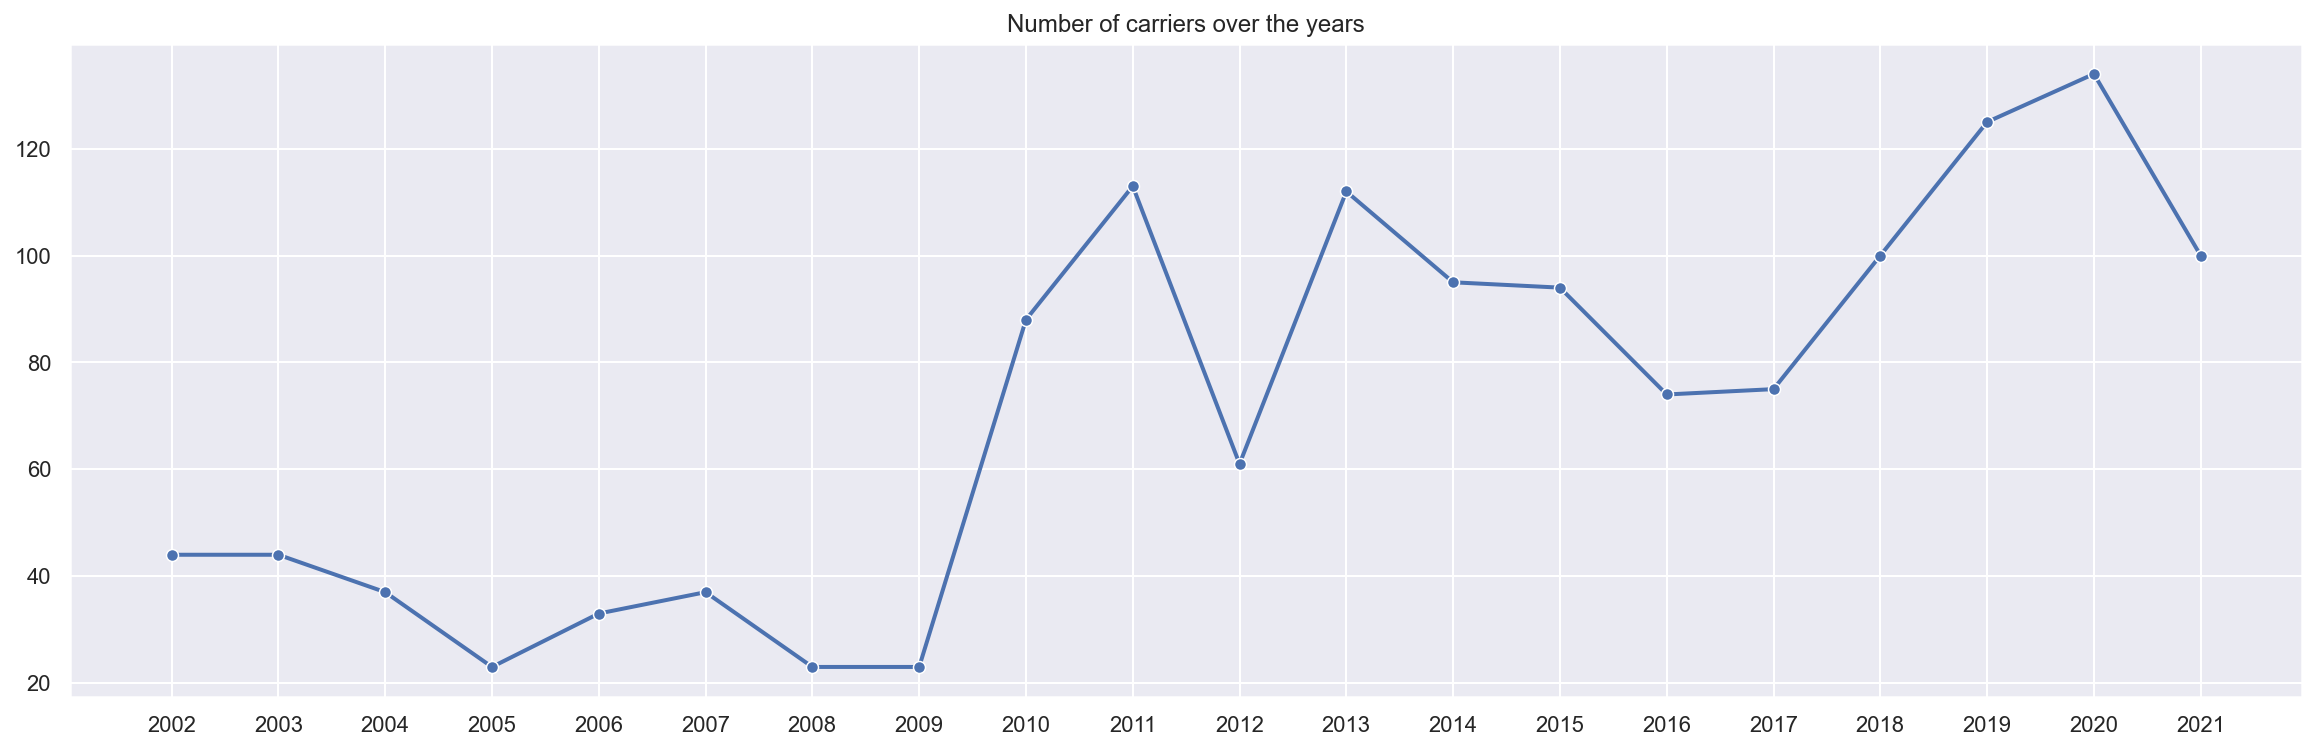

In [45]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data=reg_and_non_reg, x="sched_year", y="airports_from_reg", ax=ax, dashes=False, linewidth=2, marker="o", ci=None,)
ax.set(xticks=reg_and_non_reg.sched_year.values)
ax.set(title='Number of carriers over the years')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.show();